In [2]:
import numpy as np
import os


import random
import pandas as pd
import math
import matplotlib.pyplot as plt
import itertools
import astropy.units as u
import astropy.constants as const
import scipy.stats
import matplotlib.ticker as mtick
from ast import literal_eval
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [3]:
import sys

from s1s2_0311 import *
from read import *
from recoil_1223 import *

from plot_binned_detection_1d2d_0526 import *

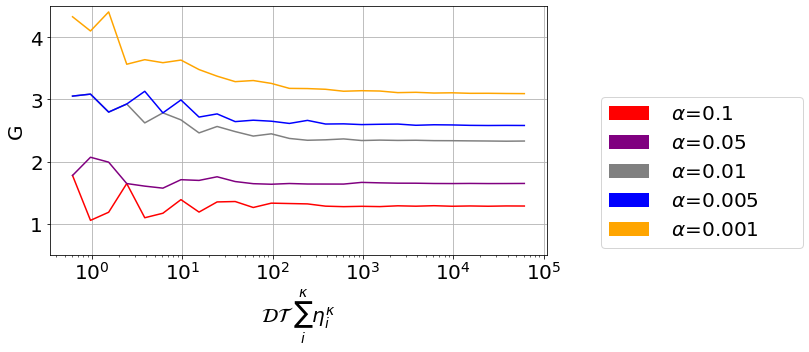

In [17]:
signal_pcles = ['atm']#, 'hep']
alphas = [0.1, 0.05, 0.01,0.005, 0.001]
lines = ['-', ':', '--']
detectors = ['SURF']#'CJPL', 'Kamioka', 'LNGS', , 'SNOlab'
fig, ax = plt.subplots(1, 1, figsize = (8, 5), sharey = True, sharex = True)
colors = ['red', 'purple', 'grey', 'blue', 'orange']
custom_colors=[Patch(facecolor=c)  for c in colors[:len(alphas)]]
label_colors = [r' $\alpha$='+str(alpha) for alpha in alphas]#detectors #
metallicity = 'high'
N_alpha_G_pd = pd.read_csv('atmhepdsnb'+'_numeNa_alpha_G_optimized_binning.csv', index_col = 0)
    
for sig, signal_pcle in enumerate(signal_pcles):

    for ab, alpha in enumerate(alphas):

        for det, detector in enumerate(detectors):
            ax.semilogx(N_alpha_G_pd[signal_pcle+'_'+detector+'_'+metallicity +'_alpha'+str(alpha)+'_mean'],  
                        N_alpha_G_pd[signal_pcle+'_'+detector+'_'+metallicity +'_alpha'+str(alpha)+'_G'], 
                        c = colors[ab], ls = '-')#lines[sig])
            #ax[ab].semilogx(N_alpha_G_pd['exposures'],  N_alpha_G_pd[detector+'_'+str(alpha)+'_N_alpha'], c = colors[det])

ax= setup_cdfpdf_ax(ax, '', 
                           r'$\cal D$$\cal T$ $\sum_{i}^{\kappa}$$\eta_{i}^{\kappa}$', 'G', True, '', 20, 20, vlines = [0], hlines = [0],
                                          xlims = [0,0], ylims = [0.5, 4.5], log = [1,0])
fig.legend(custom_colors ,label_colors,
           bbox_to_anchor=(1.05, 0.3, 0.35, .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0., fontsize = 20)

fig.tight_layout()



In [18]:

save_path = os.path.join('../phys685', 'nestfig')
save_name = os.path.join(save_path, 'method2_numeGvsDT.pdf')

print(save_name)
fig.savefig(save_name , bbox_inches='tight')



../phys685/nestfig/method2_numeGvsDT.pdf


In [3]:
sigma_percentage = 0.1
metallicity = 'high'
det_INFOS = [('Xe','numeNa_Er',('', '', 'ideal')), 
           ('Xe','thrd0_numeNa_S1S2', ('S1/S2')), 
           ('Ar','numeNa_Er',('', '', 'ideal')), 
           ('Ar','numeNa_Er',('NR_Argon_tot', '_smear'+str(sigma_percentage), 'resolution+efficiency'))]
select_methods = ['', 'no8BbgMethod2', 'lessatmlesselseMethod2']
signal_pcles = ['atm', 'hep', 'dsnb']


colors = ['red', 'purple', 'grey', 'blue', 'orange']
detectors = ['CJPL', 'Kamioka', 'LNGS', 'SURF', 'SNOlab']

In [4]:
alphas = [0.001, 0.01, 0.1]
beta = 0.9

In [5]:
metallicities = ['high']#, 'low'


atm_Xe_DT_optimized_numeNa_Erbinning.csv
atm_Xe_DT_optimized_numeNa_Erbinning.csv True
[[463.3205624456908, 300.85237551322814, 216.71870542521276]]
[[355.5755709276983, 253.406777079764, 145.15044590926718]]
[[256.2276018243868, 201.7181849198226, 115.46034457513788]]
[[171.32923035303665, 108.73946137953531, 63.42827829432511]]
[[170.0503984611157, 107.75147758397004, 62.875]]

atmhepdsnb_Xe_DT_optimized_consecutive_thrd0_numeNa_S1S2binning.csv
atmhepdsnb_Xe_DT_optimized_consecutive_thrd0_numeNa_S1S2binning.csv True
[[3503.499279584038, 2505.3726667748742, 1311.4932330827066]]
[[2362.8538776106325, 1697.7766121009315, 1004.838066001535]]
[[1514.4380443944929, 1064.7638504155125, 594.523595505618]]
[[909.0367163145132, 641.5020532799832, 360.8551875171093]]
[[903.6030998945064, 637.7193069799861, 358.6492078041116]]

atm_Ar_DT_optimized_numeNa_Erbinning.csv
atm_Ar_DT_optimized_numeNa_Erbinning.csv True
[[658.0949242849132, 456.9338009644893, 257.17042195821386]]
[[492.7212522326682, 3

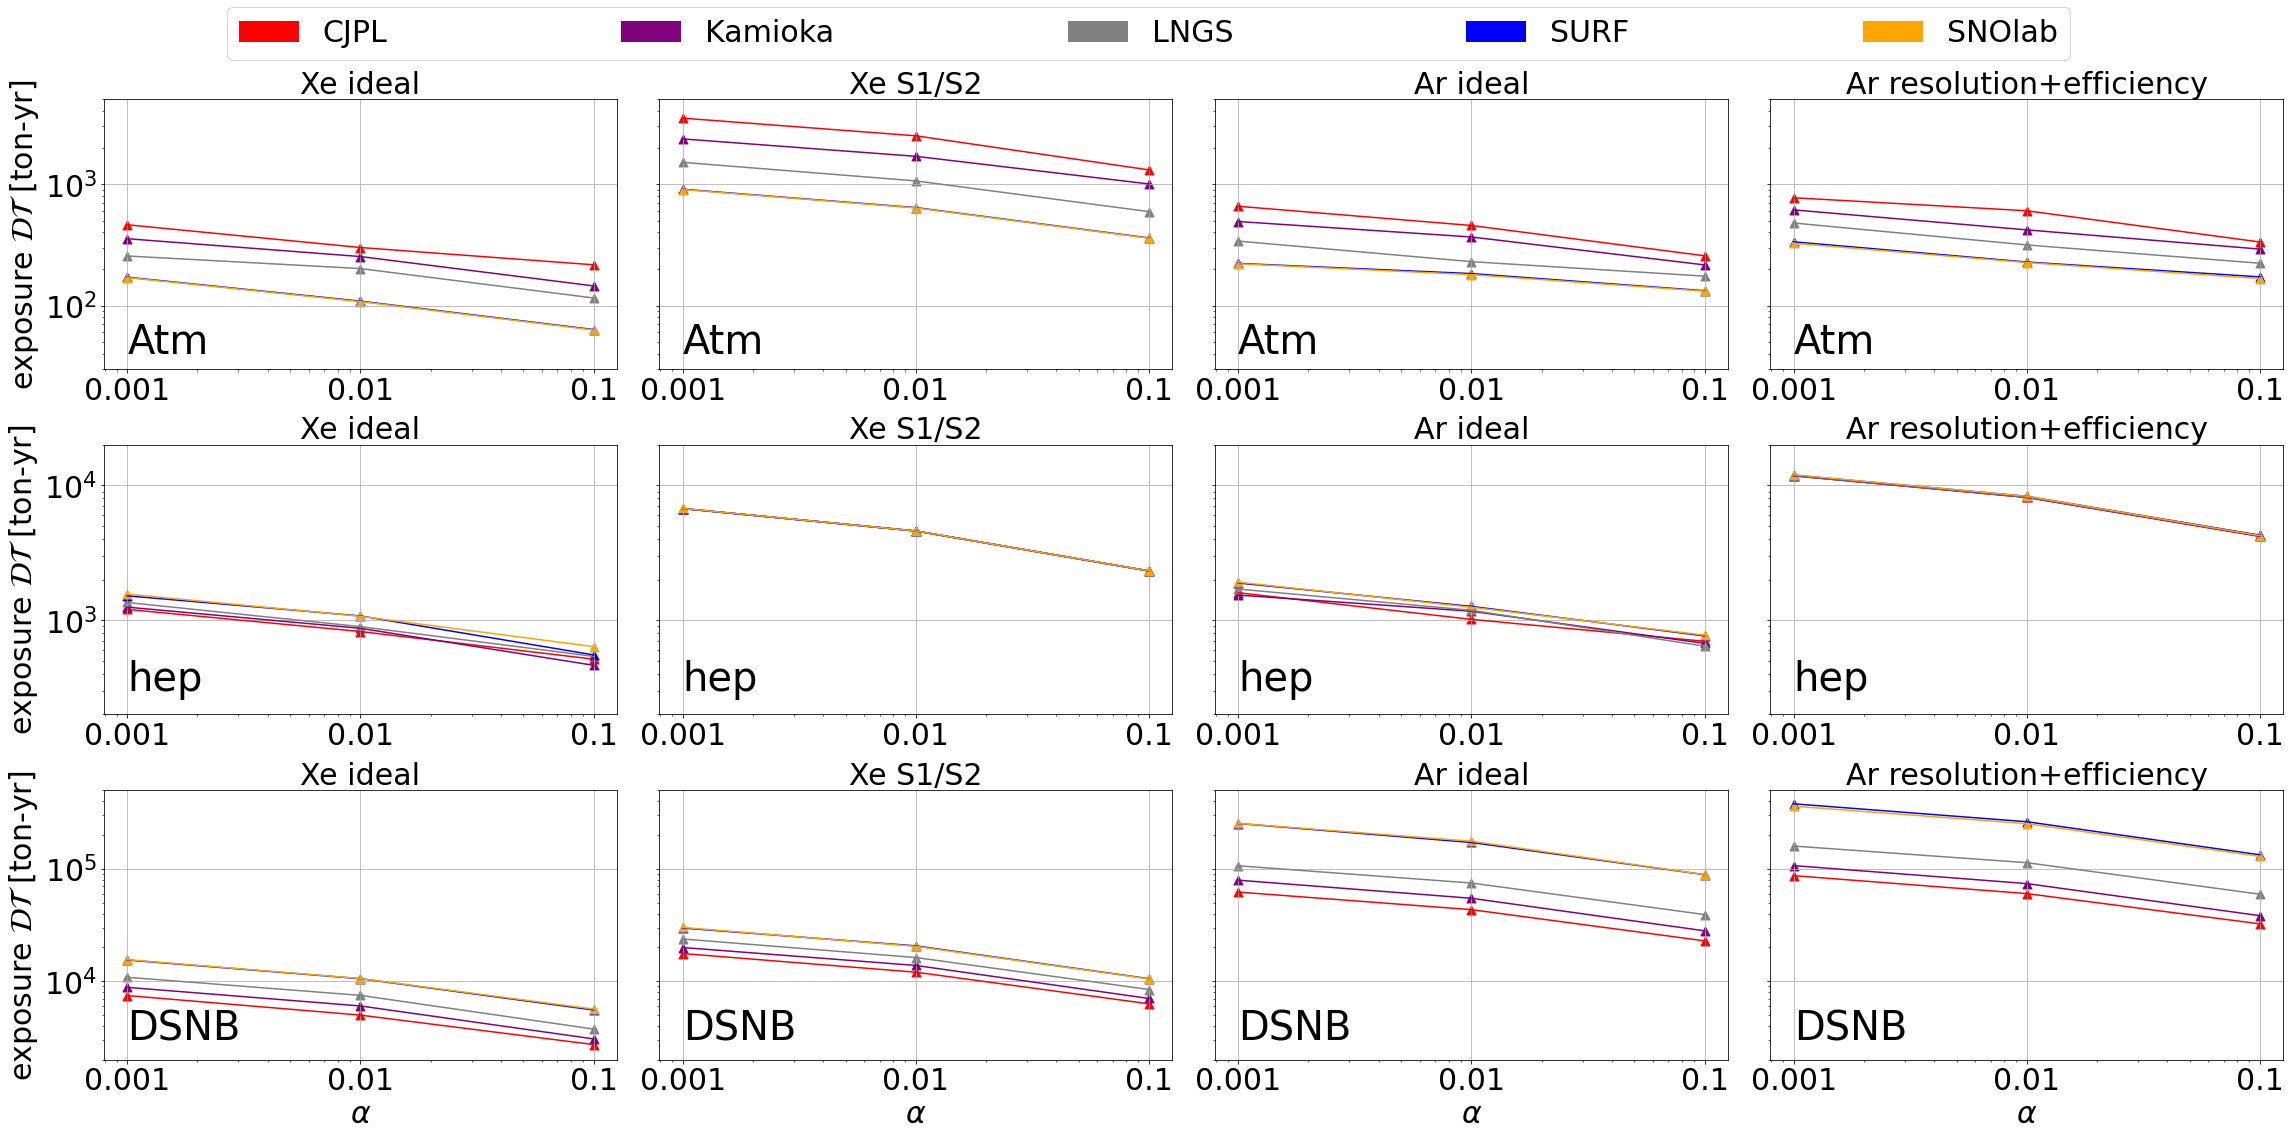

In [6]:

fig, ax = plt.subplots(nrows = len(signal_pcles), ncols = len(det_INFOS),
                       figsize = (8*len(det_INFOS), 5*len(signal_pcles)),
                      sharey='row')


custom_colors=[Patch(facecolor=c)  for c in colors[:len(detectors)]]
label_colors = detectors #

markers = ["^", "v"]
#custom_markers = [Line2D([], [], markersize= 20, color = 'black', linestyle='None', marker = m) for m in markers]
#label_markers = ['high metallicity', 'low metallicity']


for sig, (signal_pcle, select_method) in enumerate(zip(signal_pcles, select_methods)):
    
    for det_type, det_INFO in enumerate(det_INFOS):
        nuclei, binning_type, eff_corr_title = det_INFO
        if 'S1S2' in binning_type:
            title = eff_corr_title  
            file =  'atmhepdsnb' + '_'+nuclei+'_DT_optimized_consecutive_'+binning_type+'binning.csv'
            
        elif 'Er' in binning_type:
            eff, corr, title = eff_corr_title  
            eff_corr = (eff, corr)
            file =  signal_pcle + '_'+nuclei+'_DT_optimized_'+binning_type+'binning.csv'
        print(file)
        if os.path.exists(file):
            xlabel = ''
            ylabel = ''
            if sig == len(signal_pcles)-1:
                xlabel = r'$\alpha$'
            if det_type == 0:
                ylabel = r'exposure ${\cal D}$${\cal T}$ [ton-yr]'
            if sig == 0:
                tit = binning_type+' '+nuclei+' '+title
            else:
                tit = ''
            print(file, os.path.exists(file))
            DT_pd = pd.read_csv(file, index_col = 0 )
            
            
            index_ab = [str((alpha, beta)) for alpha in alphas]
            
            for det, detector in enumerate(detectors):
                metals = []
                for m, metallicity in enumerate(metallicities):
                    if metallicity == 'high':
                        marker = '^'
                    elif metallicity == 'low':
                        marker = 'v'

                    if 'S1S2' in binning_type:

                        DTs = DT_pd.loc[index_ab][signal_pcle + '_'+ detector+'_'+metallicity]
                        #print(DTs)
                        
                    elif 'Er' in binning_type:
                        method,_,_,_,_,_,_ = get_info_signalpcle(signal_pcle, title)
                        '''
                        methods = list(set([col.split('_')[-1] for col in DT_pd.columns 
                                if np.prod(DT_pd[col])>1 and 'Method2' in col]))
                        if signal_pcle == 'atm':
                            method = methods[0]
                        elif signal_pcle == 'dsnb':
                            method = 'lessatmlesselseMethod2'
                        elif signal_pcle == 'hep':
                            if eff == '':
                                method = 'no8BbgMethod2'
                            elif eff == 'NR_Argon_tot':
                                method = 'allHEPMethod2'
                        
                        if len(methods)>1:
                            method = select_method
                        else:
                            print(methods)
                            method = methods[0]
                        '''

                        cols = detector+'_'+metallicity+'_'+(''.join(eff_corr))+'_'+method

                        DTs = DT_pd.loc[index_ab][cols]
                        #print(DTs)
                    ax[sig][det_type].scatter(alphas,DTs, marker = marker, s = 80, c = colors[det], label = detector)
                    ax[sig][det_type].plot(alphas,DTs, c = colors[det])
                        
                    metals.append(list(DTs))
                print(metals)
                #ax[sig][det_type].fill_between(alphas, metals[0], metals[1],color = colors[det], alpha = 0.3)
            if sig == 0:
                ax[sig][det_type].text(0.001, 40, get_official_pcle(signal_pcle), fontsize = 40)
                ax[sig][det_type] = setup_cdfpdf_ax(ax[sig][det_type],nuclei+' '+title, 
                   xlabel, ylabel, True, '', 30,30, vlines = [0], hlines = [0],
                                  xlims = [0,0], ylims = [30,5000], log = [1,1])
            elif sig == 1:
                ax[sig][det_type].text(0.001, 300, get_official_pcle(signal_pcle), fontsize = 40)
                ax[sig][det_type] = setup_cdfpdf_ax(ax[sig][det_type], nuclei+' '+title, 
                   xlabel, ylabel, True, '', 30,30, vlines = [0], hlines = [0],
                                  xlims = [0,0], ylims = [200,2e4], log = [1,1])
            elif sig == 2:
                ax[sig][det_type].text(0.001, 3000, get_official_pcle(signal_pcle), fontsize = 40)
                ax[sig][det_type] = setup_cdfpdf_ax(ax[sig][det_type],nuclei+' '+title, 
                   xlabel, ylabel, True, '', 30,30, vlines = [0], hlines = [0],
                                  xlims = [0,0], ylims = [2000,5e5], log = [1,1])
            
            ax[sig][det_type].set_xticks(alphas)
            ax[sig][det_type].set_xticklabels(alphas)
            print()
            
        else:
            continue
fig.legend(custom_colors ,label_colors,
           bbox_to_anchor=(0.1, 1, 0.8, .102), loc='lower left',
           ncol=7, mode="expand", borderaxespad=0., fontsize = 30)


fig.tight_layout()

In [7]:

save_path = os.path.join('../phys685', 'nestfig')
save_name = os.path.join(save_path, 'method2_numeNa_DTvsALPHA_NR_thrd0S1S2.pdf')

print(save_name)
fig.savefig(save_name , bbox_inches='tight')



../phys685/nestfig/method2_numeNa_DTvsALPHA_NR_thrd0S1S2.pdf


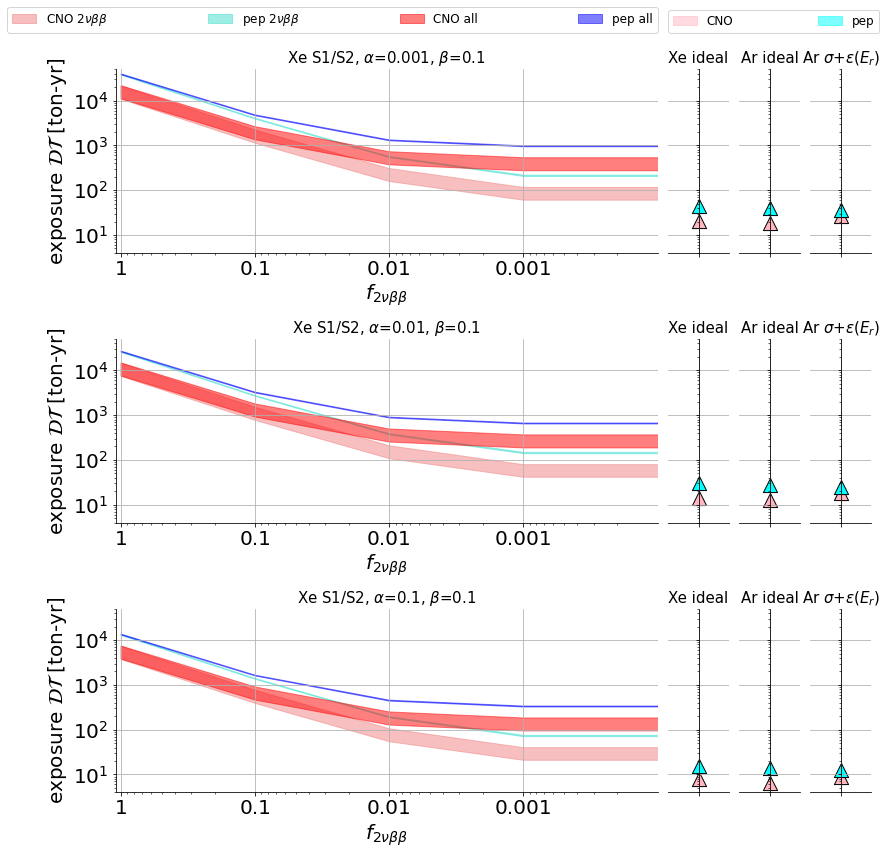

In [3]:


alpha_power_groups = [(0.001, 0.9), (0.01, 0.9), (0.1, 0.9)]
metallicities_2d = ['high', 'low']#
metallicities_1d = ['high']#

file_Xe_2d = 'CNOpep_Xe_DT_regular_thrd0_numeNa_S1S2binning.csv'
DT_pd_Xe2d = pd.read_csv(file_Xe_2d, index_col = 0)

file_Xe_1d = 'CNOpep_Xe_DT_regular_numeNa_Erbinning.csv'
DT_pd_Xe1d = pd.read_csv(file_Xe_1d, index_col = 0)

file_Ar_1d = 'CNOpep_Ar_DT_optimized_numeNa_Erbinning.csv'
DT_pd_Ar1d = pd.read_csv(file_Ar_1d, index_col = 0)

det_pcles = ['CNO', 'pep']
bg_ideals_2d = ['nubb_only', 'all']
detector = 'SURF'
nuclei_2d = 'Xenon'
nucleons_effs_corrs_bg_ideals = [('Xenon', '', '', 'ideal'), 
                                 ('Argon', '', '', 'ideal'), 
                                 ('Argon', '', '_smear0.1', 'all')]


bg_titles_1d = [r'Xe ideal' , r'Ar ideal', r'Ar $\sigma$+$\epsilon(E_{r})$']
nubb_fraction_1d = 0

nubb_fractions = [1, 0.1, 0.01, 0.001,0]


#markers = ["^", "v"]
#custom_markers = [Line2D([], [], markersize= 10, color = 'black', linestyle='None', marker = m) for m in markers]
#label_markers = ['high metallicity', 'low metallicity']

label_colors, custom_colors = [],[]
label1_colors,custom1_colors = [],[]

method = 'noppBe7Method2'
fig, ax = plt.subplots(len(alpha_power_groups),4, figsize = (12, 4*len(alpha_power_groups)), 
                       gridspec_kw={'width_ratios': [9, 1,1,1]}, sharey = True)
for ab, alpha_power in enumerate(alpha_power_groups):
    alpha, power = alpha_power
    ax[ab][0] = setup_cdfpdf_ax(ax[ab][0], 
            r'Xe S1/S2, $\alpha$='+str(alpha) +r', $\beta$='+str(round(1-power, 2)), 
            r'$f_{2\nu\beta\beta}$', r'exposure ${\cal D}{\cal T}$ [ton-yr]', True, '', 20,15, 
                                                vlines = [0], hlines = [0], 
                                   xlims = [1e-4, 1.1], ylims = [4,5e4], log = [1,1])
    ax[ab][1]= setup_cdfpdf_ax(ax[ab][1],bg_titles_1d[0] ,'', '', True, '', 20,15, 
                                                vlines = [0], hlines = [0], 
                                   xlims = [-0.01, 0.01], ylims = [0,0], log = [0,0])
    
    
    ax[ab][2]= setup_cdfpdf_ax(ax[ab][2],bg_titles_1d[1] , '', '', True, '', 20,15, 
                                                    vlines = [0], hlines = [0], 
                                       xlims = [-0.01, 0.01], ylims = [0,0], log = [0,0])
    
    
    ax[ab][3]= setup_cdfpdf_ax(ax[ab][3], bg_titles_1d[2], '', '', True, '', 20,15, 
                                                    vlines = [0], hlines = [0], 
                                       xlims = [-0.01, 0.01], ylims = [0,0], log = [0,0])
    
    
    #2d
    
    for bg, bg_ideal_2d in enumerate(bg_ideals_2d):   
        for det_pcle in det_pcles:
            c, legend_2d = get_line_color(det_pcle,bg_ideal_2d, 'Xenon')
            if ab == 0:
                label_colors.append(legend_2d)
                custom_colors.extend([Patch(color=c, alpha = 0.5)])
                
            DTs_highlow = []
            for m, metallicity in enumerate(metallicities_2d):
                
                cols = [det_pcle + '_'+bg_ideal_2d+'_'+detector+'_'+metallicity+'_nubb'+str(nubb_fraction) 
                        for nubb_fraction in nubb_fractions]
                DTs = DT_pd_Xe2d[cols].loc[str(alpha_power)]
                DTs_highlow.append(DTs)
                '''
                if metallicity == 'high':
                    ax[ab][0].scatter(nubb_fractions ,DTs, marker = "^", s = 200, color =c, edgecolors='black', label = det_pcle)
                if metallicity == 'low':
                    ax[ab][0].scatter(nubb_fractions ,DTs, marker = "v",  s = 200, color =c, edgecolors='black', label = det_pcle)
                '''
            ax[ab][0].fill_between(nubb_fractions, DTs_highlow[0], DTs_highlow[1], color = c, alpha = 0.5)
                   
    
    
    
    for det_pcle in det_pcles:
        for bg, nuclei_eff_corr_bg_ideal in enumerate(nucleons_effs_corrs_bg_ideals):   
            nuclei_1d, eff_1d, corr_1d, bg_ideal_1d = nuclei_eff_corr_bg_ideal
            eff_corr_bg_ideal = eff_1d, corr_1d, bg_ideal_1d
                
            c, _ = get_line_color(det_pcle,bg_ideal_1d, nuclei_1d)
            if ab == 0 and bg == 0:
                label1_colors.append(det_pcle)
                custom1_colors.extend([Patch(color=c, alpha = 0.5)])
            for m, metallicity in enumerate(metallicities_1d):
                if nuclei_1d == 'Xenon':
                    DT_1d = DT_pd_Xe1d.loc[str(alpha_power)][det_pcle+'_'+metallicity+'_nubb'+str(nubb_fraction_1d)+'_'+method]
                elif nuclei_1d == 'Argon':
                    DT_1d = DT_pd_Ar1d.loc[str(alpha_power)][det_pcle+'_'+metallicity+'_'+(''.join(eff_corr_bg_ideal))+'_'+method]
                if metallicity == 'high':
                    ax[ab][bg+1].scatter(nubb_fraction_1d ,DT_1d, 
                                         marker = "^", s = 200, color =c, edgecolors='black', label = det_pcle)
                if metallicity == 'low':
                    ax[ab][bg+1].scatter(nubb_fraction_1d ,DT_1d, 
                                         marker = "v",  s = 200, color =c, edgecolors='black', label = det_pcle)


          
    ax[ab][0].set_xticks([1, 0.1, 0.01, 0.001])
    formatter = mtick.ScalarFormatter()
    formatter.set_scientific(False)
    ax[ab][0].xaxis.set_major_formatter(formatter)
    ax[ab][0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.5g'))
    ax[ab][0].invert_xaxis()
    ax[ab][0].yaxis.set_major_locator(mtick.LogLocator(base=10.0, numticks=15))
    locmin = mtick.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                          numticks=100)
    ax[ab][0].yaxis.set_minor_locator(locmin)
    ax[ab][0].spines['right'].set_color('none')
    ax[ab][0].spines['top'].set_color('none')
    
    
    ax[ab][1].set_xticks([0])
    ax[ab][1].xaxis.set_major_formatter(formatter)
    ax[ab][1].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.5g'))
    ax[ab][1].spines['left'].set_position('center')
    ax[ab][1].spines['right'].set_color('none')
    ax[ab][1].spines['top'].set_color('none')
    
    ax[ab][2].set_xticks([0])
    ax[ab][2].xaxis.set_major_formatter(formatter)
    ax[ab][2].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.5g'))
    ax[ab][2].spines['left'].set_position('center')
    ax[ab][2].spines['right'].set_color('none')
    ax[ab][2].spines['top'].set_color('none')

    ax[ab][3].set_xticks([0])
    ax[ab][3].xaxis.set_major_formatter(formatter)
    ax[ab][3].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.5g'))
    ax[ab][3].spines['left'].set_position('center')
    ax[ab][3].spines['right'].set_color('none')
    ax[ab][3].spines['top'].set_color('none')
    
    ax[ab][1].set_xticklabels([])
    ax[ab][2].set_xticklabels([])
    ax[ab][3].set_xticklabels([])
    


ax[0][0].legend( custom_colors,label_colors,
           bbox_to_anchor=(-0.2, 1.2, 1.2, .102), loc='lower left',
           ncol=4, mode="expand", borderaxespad=0., 
           fontsize = 12
        )
ax[0][1].legend(custom1_colors, label1_colors,
           bbox_to_anchor=(0, 1.2, 3.5
                           , .102), loc='lower left',
           ncol=4, mode="expand", borderaxespad=0., 
           fontsize = 12
        )

fig.tight_layout()

# table of fixed confidence level

In [4]:

save_path = os.path.join('../phys685', 'nestfig')
save_name = os.path.join(save_path, 'method2_numeNa_DTvsALPHA_thrd0_ER.pdf')

print(save_name)
fig.savefig(save_name , bbox_inches='tight')



../phys685/nestfig/method2_numeNa_DTvsALPHA_thrd0_ER.pdf


# get table S1S2 Xenon

In [22]:
file_Xe_2d_ES = 'CNOpep_Xe_DT_regular_thrd0_numeNa_S1S2binning.csv'
DT_pd_Xe2d_ES = pd.read_csv(file_Xe_2d_ES, index_col = 0)

file_Xe_2d_NR = 'atmhepdsnb_Xe_DT_optimized_consecutive_thrd0_numeNa_S1S2binning.csv'
DT_pd_Xe2d_NR = pd.read_csv(file_Xe_2d_NR, index_col = 0)



In [50]:
alpha_power_groups = [(0.001, 0.8), (0.001, 0.9),(0.001, 0.95), 
                      (0.01, 0.8), (0.01, 0.9),(0.01, 0.95), 
                     (0.1, 0.8), (0.1, 0.9),(0.1, 0.95)]
change_column = [str(alpha_power) for alpha_power in alpha_power_groups]
change_column

['(0.001, 0.8)',
 '(0.001, 0.9)',
 '(0.001, 0.95)',
 '(0.01, 0.8)',
 '(0.01, 0.9)',
 '(0.01, 0.95)',
 '(0.1, 0.8)',
 '(0.1, 0.9)',
 '(0.1, 0.95)']

In [51]:
sel_ES = [col for col in DT_pd_Xe2d_ES.columns if 'SURF' in col and ('_nubb1' in col ) and 'high' in col]

DT_pd_ES_output2d = DT_pd_Xe2d_ES[sel_ES].T.reindex(columns=change_column)
DT_pd_ES_output2d

,"(0.001, 0.8)","(0.001, 0.9)","(0.001, 0.95)","(0.01, 0.8)","(0.01, 0.9)","(0.01, 0.95)","(0.1, 0.8)","(0.1, 0.9)","(0.1, 0.95)"
CNO_nubb_only_SURF_high_nubb1,8741.786325,10812.699014,12650.737301,5666.430558,7348.893683,8912.557485,2547.654582,3716.790072,4838.025316
CNO_all_SURF_high_nubb1,8903.185292,11007.047715,12907.605917,5759.545572,7497.565307,9090.234452,2598.119363,3779.358729,4922.576819
pep_nubb_only_SURF_high_nubb1,31351.372838,38791.842773,45492.651031,20404.313778,26455.051237,32054.104137,9134.147673,13300.948673,17422.523949
pep_all_SURF_high_nubb1,31995.962984,39551.554391,46385.795335,20773.814469,26943.672708,32638.270504,9330.128069,13597.371618,17742.693522


In [52]:
sel_NR = [col for col in DT_pd_Xe2d_NR.columns if 'SURF' in col and  'high' in col]
sel_NR

DT_pd_NR_output2d = DT_pd_Xe2d_NR[sel_NR].T.reindex(columns=change_column)
DT_pd_NR_output2d

,"(0.001, 0.8)","(0.001, 0.9)","(0.001, 0.95)","(0.01, 0.8)","(0.01, 0.9)","(0.01, 0.95)","(0.1, 0.8)","(0.1, 0.9)","(0.1, 0.95)"
atm_SURF_high,718.029599,909.632157,1097.249144,513.890705,641.643506,766.477469,249.211893,360.940884,475.164579
hep_SURF_high,5448.499461,6740.943873,7907.077839,3534.830986,4588.893000,5567.307386,1586.290897,2320.974746,3029.751971
dsnb_SURF_high,23960.317734,30270.363014,35203.477688,15628.724696,20502.274388,24857.726124,7072.057307,10660.107448,13878.619552


In [53]:
DT_pd_table = pd.concat([DT_pd_ES_output2d, DT_pd_NR_output2d]).round(0).astype(int)
DT_pd_table

,"(0.001, 0.8)","(0.001, 0.9)","(0.001, 0.95)","(0.01, 0.8)","(0.01, 0.9)","(0.01, 0.95)","(0.1, 0.8)","(0.1, 0.9)","(0.1, 0.95)"
CNO_nubb_only_SURF_high_nubb1,8742,10813,12651,5666,7349,8913,2548,3717,4838
CNO_all_SURF_high_nubb1,8903,11007,12908,5760,7498,9090,2598,3779,4923
pep_nubb_only_SURF_high_nubb1,31351,38792,45493,20404,26455,32054,9134,13301,17423
pep_all_SURF_high_nubb1,31996,39552,46386,20774,26944,32638,9330,13597,17743
atm_SURF_high,718,910,1097,514,642,766,249,361,475
hep_SURF_high,5448,6741,7907,3535,4589,5567,1586,2321,3030
dsnb_SURF_high,23960,30270,35203,15629,20502,24858,7072,10660,13879


In [55]:
DT_pd_table.to_csv('fixed_confidencelevel_S1S2.csv')

# get table Argon Er

In [20]:
DT_pd_NR = pd.DataFrame()
for pcle in ['atm', 'hep', 'dsnb']:
    file_Ar_NR = pcle+'_Ar_DT_optimized_numeNa_Erbinning.csv'
    DT_Ar_NR = pd.read_csv(file_Ar_NR, index_col = 0)
    method, _, _, _, _, _, _ = get_info_signalpcle(pcle, 'smear')
    sel_NR = [col for col in DT_Ar_NR.columns if 'SURF' in col and method in col and  'high' in col and 'smear' in col]
    print(method, sel_NR)
    DT_pd_NR[pcle+'_'+sel_NR[0]] = DT_Ar_NR[sel_NR]


lessbgMethod2 ['SURF_high_NR_Argon_tot_smear0.1_lessbgMethod2']
allHEPMethod2 ['SURF_high_NR_Argon_tot_smear0.1_allHEPMethod2']
lessatmlesselseMethod2 ['SURF_high_NR_Argon_tot_smear0.1_lessatmlesselseMethod2']


In [23]:
DT_pd_NR_output = DT_pd_NR.T.reindex(columns=change_column)
DT_pd_NR_output

,"(0.001, 0.8)","(0.001, 0.9)","(0.001, 0.95)","(0.01, 0.8)","(0.01, 0.9)","(0.01, 0.95)","(0.1, 0.8)","(0.1, 0.9)","(0.1, 0.95)"
atm_SURF_high_NR_Argon_tot_smear0.1_lessbgMethod2,233.400110,334.404452,427.551129,190.299612,228.343113,316.428078,131.805211,172.193004,213.498101
hep_SURF_high_NR_Argon_tot_smear0.1_allHEPMethod2,33713.500041,41976.435731,50810.756469,21861.347472,28986.189634,35434.944526,9943.282220,14648.730174,19132.656645
dsnb_SURF_high_NR_Argon_tot_smear0.1_lessatmlesselseMethod2,303434.764205,376133.018885,443940.068669,195696.064350,259075.568520,316675.389597,90155.223950,136655.688557,173341.745468


In [29]:
file_Ar_ES = 'CNOpep_Ar_DT_optimized_numeNa_Erbinning.csv'
DT_Ar_ES = pd.read_csv(file_Ar_ES, index_col = 0)
sel_ES = [col for col in DT_Ar_ES.columns if 'smear' in col and ('noppBe7' in col ) and 'high' in col]
sel_ES

['CNO_high__smear0.1all_noppBe7Method2',
 'pep_high__smear0.1all_noppBe7Method2']

In [30]:

DT_pd_ES_output = DT_Ar_ES[sel_ES].T.reindex(columns=change_column)
DT_pd_ES_output

,"(0.001, 0.8)","(0.001, 0.9)","(0.001, 0.95)","(0.01, 0.8)","(0.01, 0.9)","(0.01, 0.95)","(0.1, 0.8)","(0.1, 0.9)","(0.1, 0.95)"
CNO_high__smear0.1all_noppBe7Method2,21.200955,26.229395,30.569531,13.760179,17.900233,21.772431,6.362720,8.984009,11.791546
pep_high__smear0.1all_noppBe7Method2,28.939641,35.628420,42.032838,18.798791,24.501227,29.735948,8.577852,12.484705,16.368129


In [31]:
DT_pd_table = pd.concat([DT_pd_ES_output, DT_pd_NR_output]).round(0).astype(int)
DT_pd_table

,"(0.001, 0.8)","(0.001, 0.9)","(0.001, 0.95)","(0.01, 0.8)","(0.01, 0.9)","(0.01, 0.95)","(0.1, 0.8)","(0.1, 0.9)","(0.1, 0.95)"
CNO_high__smear0.1all_noppBe7Method2,21,26,31,14,18,22,6,9,12
pep_high__smear0.1all_noppBe7Method2,29,36,42,19,25,30,9,12,16
atm_SURF_high_NR_Argon_tot_smear0.1_lessbgMethod2,233,334,428,190,228,316,132,172,213
hep_SURF_high_NR_Argon_tot_smear0.1_allHEPMethod2,33714,41976,50811,21861,28986,35435,9943,14649,19133
dsnb_SURF_high_NR_Argon_tot_smear0.1_lessatmlesselseMethod2,303435,376133,443940,195696,259076,316675,90155,136656,173342


In [32]:
DT_pd_table.to_csv('fixed_confidencelevel_ArEr.csv')